In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
zyd = pd.read_csv('August Zydus.csv')

In [4]:
zyd

,S.No.,MRN,Patient Name,Age,Gender,Mobile No,Department,Doctor,Consultation Request Date/Time,Consultation Type,Queue Generation Time,Queue No.
0,1,10002023405292,Mrs SHAJNADEVI .,72,FEMALE,9001913817,Emergency Medicine,Dr. RIGNESH PATEL,31/08/2023 10:45 PM,OPD FIRST VISIT,31/08/2023 10:45 PM,28
1,2,10002023405291,Mrs GAYATRIBEN M PATEL,48,FEMALE,9106405829,Emergency Medicine,Dr. RIGNESH PATEL,31/08/2023 09:33 PM,OPD FIRST VISIT,31/08/2023 09:33 PM,27
2,3,10002023405290,Mrs NIHARIKA CHANDUBHAI KHARADI,28,FEMALE,9725598948,Emergency Medicine,Dr. RIGNESH PATEL,31/08/2023 09:01 PM,OPD FIRST VISIT,31/08/2023 09:01 PM,26
3,4,10002023393280,Mr RAJ KUMAR,33,MALE,8169153120,Emergency Medicine,Dr. RIGNESH PATEL,31/08/2023 08:05 PM,OPD FIRST VISIT,31/08/2023 08:05 PM,25
4,5,10002023405289,Mrs INDIRA NARHARIPRASAD PUROHIT,86,FEMALE,9825049271,Gastroenterology,Dr. NILAY MEHTA,31/08/2023 07:15 PM,OPD FIRST VISIT,31/08/2023 07:15 PM,41
...,...,...,...,...,...,...,...,...,...,...,...,...
20347,"20,348",10002020236942,Mrs ZABUBEN SOMABHAI DALWADI,70,FEMALE,8849791008,Emergency Medicine,Dr. KETAN PATEL,01/08/2023 01:49 AM,OPD FIRST VISIT,01/08/2023 01:49 AM,2
20348,"20,349",10002023400394,Mr MANOJ DAYACHAND JAIN,60,MALE,9820767777,Emergency Medicine,Dr. RIGNESH PATEL,01/08/2023 01:37 AM,OPD FIRST VISIT,01/08/2023 01:36 AM,1
20349,"20,350",10002019171131,Master DAKSH ARSHI ODEDRA,5,MALE,9712930076,Pediatrics,Dr. ANKIT MEHTA,01/08/2023 01:31 AM,OPD FOLLOWUP VISIT,NaN,18
20350,"20,351",10002023400393,Mrs SHOBHA MANOJ JAIN,51,FEMALE,8898420838,Emergency Medicine,Dr. RIGNESH PATEL,01/08/2023 12:49 AM,OPD FIRST VISIT,01/08/2023 12:49 AM,2


In [5]:
zyd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20352 entries, 0 to 20351
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   S.No.                           20352 non-null  object
 1   MRN                             20352 non-null  int64 
 2   Patient Name                    20352 non-null  object
 3   Age                             20352 non-null  int64 
 4   Gender                          20352 non-null  object
 5   Mobile No                       20300 non-null  object
 6   Department                      20352 non-null  object
 7   Doctor                          20352 non-null  object
 8   Consultation Request Date/Time  20352 non-null  object
 9   Consultation Type               20352 non-null  object
 10  Queue Generation Time           18749 non-null  object
 11  Queue No.                       20352 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.9+ MB


In [5]:
pd.isnull(zyd).sum()

S.No.                                0
MRN                                  0
Patient Name                         0
Age                                  0
Gender                               0
Mobile No                           52
Department                           0
Doctor                               0
Consultation Request Date/Time       0
Consultation Type                    0
Queue Generation Time             1603
Queue No.                            0
dtype: int64

In [6]:
zyd.drop(['Mobile No', 'Queue Generation Time'], axis =1, inplace =True)

In [7]:
zyd.columns

Index(['S.No.', 'MRN', 'Patient Name', 'Age', 'Gender', 'Department ',
       'Doctor', 'Consultation Request Date/Time', 'Consultation Type',
       'Queue No.'],
      dtype='object')

In [8]:
zyd.drop(['S.No.','Queue No.'], axis =1, inplace= True)

In [9]:
from datetime import datetime

In [10]:
# Convert the 'DateTime' column to a datetime object with AM/PM format
zyd['Consultation Request Date/Time'] = pd.to_datetime(zyd['Consultation Request Date/Time'], format='%d/%m/%Y %I:%M %p')

# Extract the date and time components
zyd['Consultation Request Date'] = zyd['Consultation Request Date/Time'].dt.date
zyd['Time'] = zyd['Consultation Request Date/Time'].dt.time

# Display the DataFrame
print(zyd)


                  MRN                      Patient Name  Age  Gender  \
0      10002023405292                  Mrs SHAJNADEVI .   72  FEMALE   
1      10002023405291            Mrs GAYATRIBEN M PATEL   48  FEMALE   
2      10002023405290   Mrs NIHARIKA CHANDUBHAI KHARADI   28  FEMALE   
3      10002023393280                      Mr RAJ KUMAR   33    MALE   
4      10002023405289  Mrs INDIRA NARHARIPRASAD PUROHIT   86  FEMALE   
...               ...                               ...  ...     ...   
20347  10002020236942      Mrs ZABUBEN SOMABHAI DALWADI   70  FEMALE   
20348  10002023400394           Mr MANOJ DAYACHAND JAIN   60    MALE   
20349  10002019171131         Master DAKSH ARSHI ODEDRA    5    MALE   
20350  10002023400393             Mrs SHOBHA MANOJ JAIN   51  FEMALE   
20351  10002023400392         Mrs PRAGATI DEVEN CHOKSHI   55  FEMALE   

              Department              Doctor Consultation Request Date/Time  \
0      Emergency Medicine  Dr. RIGNESH PATEL            

In [11]:
zyd.dropna(inplace= True)

In [12]:
zyd.drop(['Consultation Request Date/Time'], axis =1, inplace= True)

In [13]:
# Define age category ranges (example ranges)
youngest_age = 18
middle_age = 35
oldest_age = 60

# Function to categorize ages into age categories
def categorize_age(age):
    if age >= oldest_age:
        return 'Senior'
    elif age >= middle_age:
        return 'Middle-aged'
    elif age >= youngest_age:
        return 'Young'
    else:
        return 'Child'

# Apply the categorization function to create a new column
zyd['Age Category'] = zyd['Age'].apply(categorize_age)

# Display the DataFrame
print(zyd)


                  MRN                      Patient Name  Age  Gender  \
0      10002023405292                  Mrs SHAJNADEVI .   72  FEMALE   
1      10002023405291            Mrs GAYATRIBEN M PATEL   48  FEMALE   
2      10002023405290   Mrs NIHARIKA CHANDUBHAI KHARADI   28  FEMALE   
3      10002023393280                      Mr RAJ KUMAR   33    MALE   
4      10002023405289  Mrs INDIRA NARHARIPRASAD PUROHIT   86  FEMALE   
...               ...                               ...  ...     ...   
20347  10002020236942      Mrs ZABUBEN SOMABHAI DALWADI   70  FEMALE   
20348  10002023400394           Mr MANOJ DAYACHAND JAIN   60    MALE   
20349  10002019171131         Master DAKSH ARSHI ODEDRA    5    MALE   
20350  10002023400393             Mrs SHOBHA MANOJ JAIN   51  FEMALE   
20351  10002023400392         Mrs PRAGATI DEVEN CHOKSHI   55  FEMALE   

              Department              Doctor   Consultation Type  \
0      Emergency Medicine  Dr. RIGNESH PATEL     OPD FIRST VISIT   

In [16]:
# Define time zone ranges as datetime.time objects
morning_start = datetime.strptime('05:00:00', '%H:%M:%S').time()
morning_end = datetime.strptime('11:59:59', '%H:%M:%S').time()

lunch_start = datetime.strptime('12:00:00', '%H:%M:%S').time()
lunch_end = datetime.strptime('13:59:59', '%H:%M:%S').time()

evening_start = datetime.strptime('17:00:00', '%H:%M:%S').time()
evening_end = datetime.strptime('21:59:59', '%H:%M:%S').time()

night_start = datetime.strptime('22:00:00', '%H:%M:%S').time()
night_end = datetime.strptime('04:59:59', '%H:%M:%S').time()  # Assumes night continues until 4:59:59 of the following day

# Function to categorize time into time zones
def categorize_time(time_value):
    if morning_start <= time_value <= morning_end:
        return 'Morning Time'
    elif lunch_start <= time_value <= lunch_end:
        return 'Lunch Time'
    elif evening_start <= time_value <= evening_end:
        return 'Evening Time'
    elif night_start <= time_value or time_value <= night_end:
        return 'Night Time'
    else:
        return 'Other'

# Apply the categorization function to create a new column
zyd['Time Zone'] = zyd['Time'].apply(categorize_time)

# Display the DataFrame
print(zyd)


                  MRN                      Patient Name  Age  Gender  \
0      10002023405292                  Mrs SHAJNADEVI .   72  FEMALE   
1      10002023405291            Mrs GAYATRIBEN M PATEL   48  FEMALE   
2      10002023405290   Mrs NIHARIKA CHANDUBHAI KHARADI   28  FEMALE   
3      10002023393280                      Mr RAJ KUMAR   33    MALE   
4      10002023405289  Mrs INDIRA NARHARIPRASAD PUROHIT   86  FEMALE   
...               ...                               ...  ...     ...   
20347  10002020236942      Mrs ZABUBEN SOMABHAI DALWADI   70  FEMALE   
20348  10002023400394           Mr MANOJ DAYACHAND JAIN   60    MALE   
20349  10002019171131         Master DAKSH ARSHI ODEDRA    5    MALE   
20350  10002023400393             Mrs SHOBHA MANOJ JAIN   51  FEMALE   
20351  10002023400392         Mrs PRAGATI DEVEN CHOKSHI   55  FEMALE   

              Department              Doctor   Consultation Type  \
0      Emergency Medicine  Dr. RIGNESH PATEL     OPD FIRST VISIT   

In [27]:
# Rearrange the columns
cols = zyd.columns.tolist()
cols.insert(cols.index('Age') + 1, cols.pop(cols.index('Age Category')))
zyd = zyd[cols]

# Print the resulting DataFrame
print(zyd)


                  MRN                      Patient Name  Age Age Category  \
0      10002023405292                  Mrs SHAJNADEVI .   72       Senior   
1      10002023405291            Mrs GAYATRIBEN M PATEL   48  Middle-aged   
2      10002023405290   Mrs NIHARIKA CHANDUBHAI KHARADI   28        Young   
3      10002023393280                      Mr RAJ KUMAR   33        Young   
4      10002023405289  Mrs INDIRA NARHARIPRASAD PUROHIT   86       Senior   
...               ...                               ...  ...          ...   
20347  10002020236942      Mrs ZABUBEN SOMABHAI DALWADI   70       Senior   
20348  10002023400394           Mr MANOJ DAYACHAND JAIN   60       Senior   
20349  10002019171131         Master DAKSH ARSHI ODEDRA    5        Child   
20350  10002023400393             Mrs SHOBHA MANOJ JAIN   51  Middle-aged   
20351  10002023400392         Mrs PRAGATI DEVEN CHOKSHI   55  Middle-aged   

       Gender         Department              Doctor   Consultation Type  \

In [29]:
zyd = zyd.loc[:, ~zyd.columns.duplicated(keep='first')]

In [96]:
zyd

,MRN,Patient Name,Age,Age Category,Gender,Department,Doctor,Consultation Type,Consultation Request Date,Time,Time Zone
0,10002023405292,Mrs SHAJNADEVI .,72,Senior,FEMALE,Emergency Medicine,Dr. RIGNESH PATEL,OPD FIRST VISIT,2023-08-31,22:45:00,Night Time
1,10002023405291,Mrs GAYATRIBEN M PATEL,48,Middle-aged,FEMALE,Emergency Medicine,Dr. RIGNESH PATEL,OPD FIRST VISIT,2023-08-31,21:33:00,Evening Time
2,10002023405290,Mrs NIHARIKA CHANDUBHAI KHARADI,28,Young,FEMALE,Emergency Medicine,Dr. RIGNESH PATEL,OPD FIRST VISIT,2023-08-31,21:01:00,Evening Time
3,10002023393280,Mr RAJ KUMAR,33,Young,MALE,Emergency Medicine,Dr. RIGNESH PATEL,OPD FIRST VISIT,2023-08-31,20:05:00,Evening Time
4,10002023405289,Mrs INDIRA NARHARIPRASAD PUROHIT,86,Senior,FEMALE,Gastroenterology,Dr. NILAY MEHTA,OPD FIRST VISIT,2023-08-31,19:15:00,Evening Time
...,...,...,...,...,...,...,...,...,...,...,...
20347,10002020236942,Mrs ZABUBEN SOMABHAI DALWADI,70,Senior,FEMALE,Emergency Medicine,Dr. KETAN PATEL,OPD FIRST VISIT,2023-08-01,01:49:00,Night Time
20348,10002023400394,Mr MANOJ DAYACHAND JAIN,60,Senior,MALE,Emergency Medicine,Dr. RIGNESH PATEL,OPD FIRST VISIT,2023-08-01,01:37:00,Night Time
20349,10002019171131,Master DAKSH ARSHI ODEDRA,5,Child,MALE,Pediatrics,Dr. ANKIT MEHTA,OPD FOLLOWUP VISIT,2023-08-01,01:31:00,Night Time
20350,10002023400393,Mrs SHOBHA MANOJ JAIN,51,Middle-aged,FEMALE,Emergency Medicine,Dr. RIGNESH PATEL,OPD FIRST VISIT,2023-08-01,00:49:00,Night Time


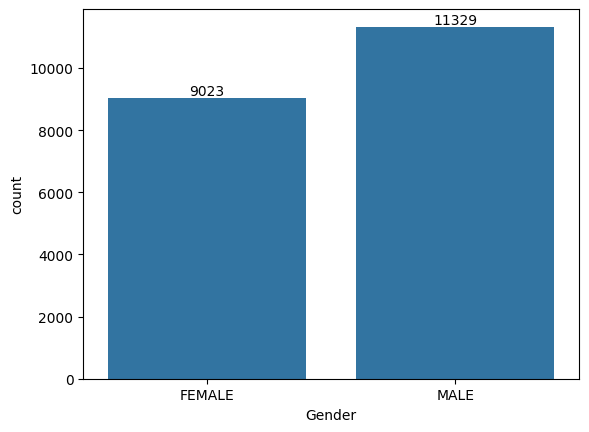

In [34]:
us = sns.countplot(x= 'Gender', data = zyd)

for bars in us.containers:
    us.bar_label(bars)

In [35]:
zyd.columns

Index(['MRN', 'Patient Name', 'Age', 'Age Category', 'Gender', 'Department ',
       'Doctor', 'Consultation Type', 'Consultation Request Date', 'Time',
       'Time Zone'],
      dtype='object')

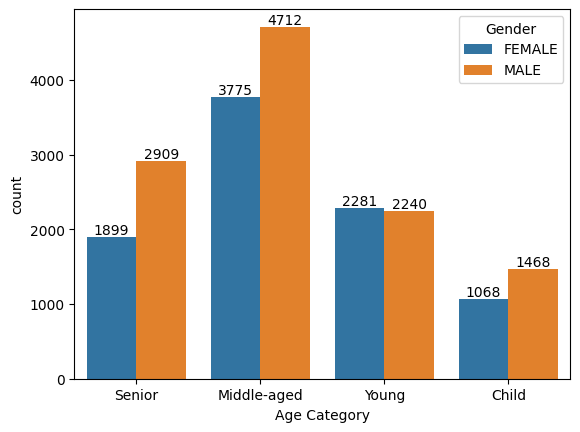

In [37]:
us = sns.countplot(x= 'Age Category', data = zyd, hue ='Gender')

for bars in us.containers:
    us.bar_label(bars)

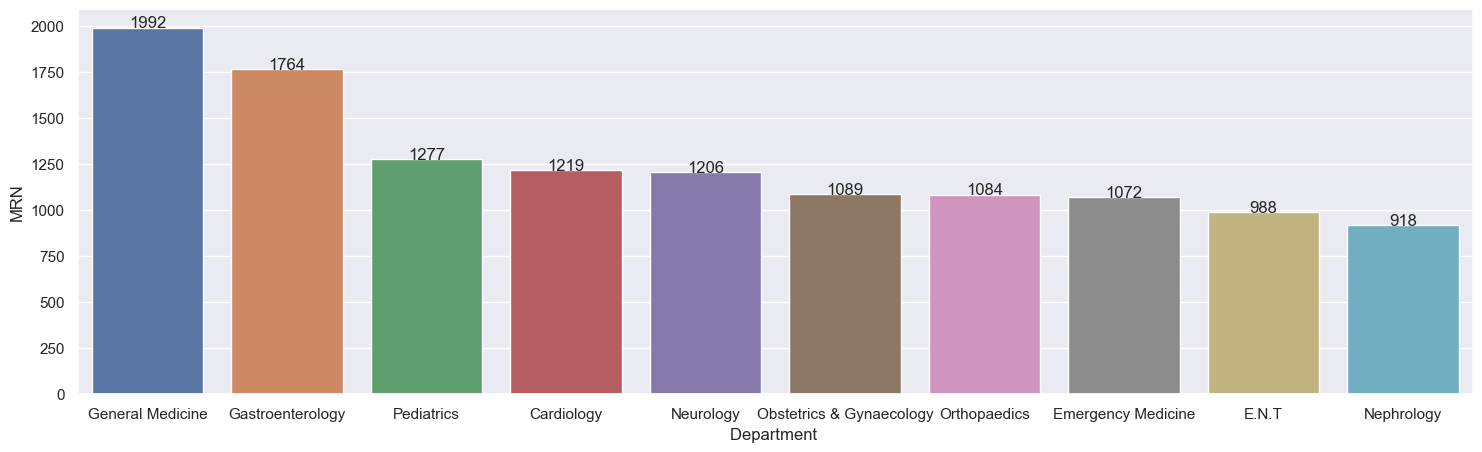

In [85]:
#count of patients seen by each doctor
patient_count = zyd.groupby('Department ')['MRN'].count().reset_index()
patient_count = patient_count.sort_values(by='MRN', ascending=False).head(10)

sns.set(rc={'figure.figsize': (18, 5)})
ax = sns.barplot(x='Department ', y='MRN', data=patient_count, hue='Department ')

# Add the count of patients seen by each doctor above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

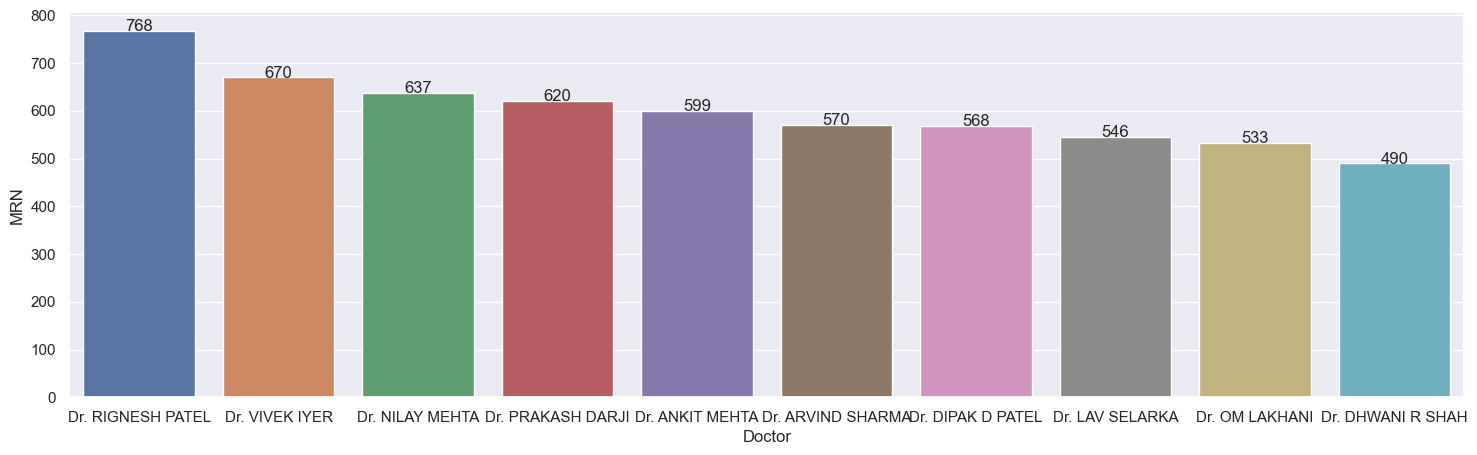

In [83]:
#count of patients seen by each doctor
patient_count = zyd.groupby('Doctor')['MRN'].count().reset_index()
patient_count = patient_count.sort_values(by='MRN', ascending=False).head(10)

sns.set(rc={'figure.figsize': (18, 5)})
ax = sns.barplot(x='Doctor', y='MRN', data=patient_count, hue='Doctor')

# Add the count of patients seen by each doctor above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

ValueError: could not convert string to float: 'Mrs SHAJNADEVI .'

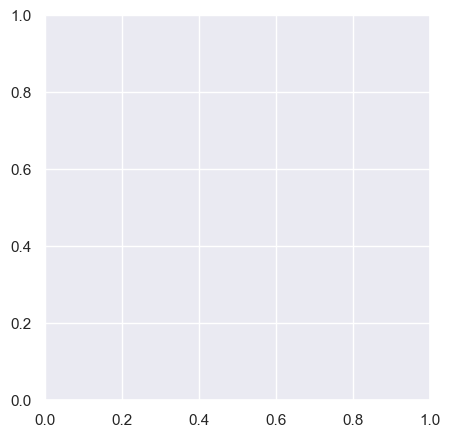

In [97]:

plt.pie(zyd, labels='Consultation Type', autopct='%1.1f%%', startangle=140)
plt.title("Consultation Type")
plt.show()


In [ ]:
px.pie(zyd.query('Consultation Type').query("Consultation Type"), values = "pop", 
       names = "country")